In [1]:
#exp3 ID3 DecisionTree 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [5]:
scr = StandardScaler()
scr.fit(X_train)
X_train = scr.transform(X_train)
X_test = scr.transform(X_test)

In [6]:
X_train[:10]

array([[ 0.01543995, -0.11925475,  0.22512685,  0.35579762],
       [-0.09984503, -1.04039491,  0.11355956, -0.02984109],
       [ 1.05300481, -0.11925475,  0.95031423,  1.12707506],
       [-1.36797986,  0.34131533, -1.39259884, -1.31530348],
       [ 1.1682898 ,  0.11103029,  0.72717965,  1.38416753],
       [-1.0221249 ,  1.03217045, -1.2252479 , -0.80111852],
       [-0.56098497,  1.49274053, -1.28103155, -1.31530348],
       [-1.0221249 , -2.42210516, -0.16535866, -0.28693357],
       [ 0.70714986, -0.11925475,  0.95031423,  0.74143634],
       [ 0.93771983,  0.57160037,  1.06188152,  1.64126001]])

In [14]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy',
                                     random_state = 100, max_depth = 3)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [15]:
y_pred = clf_entropy.predict(X_test)
print('predicted values : ', y_pred)

predicted values :  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [16]:
import numpy as np
y_pred = np.array([iris.target_names[i] for i in y_pred])

In [17]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype='<U10')

In [18]:
print('Accuracy : ', end = "")
print(clf_entropy.score(X_test, y_test))

Accuracy : 0.9736842105263158


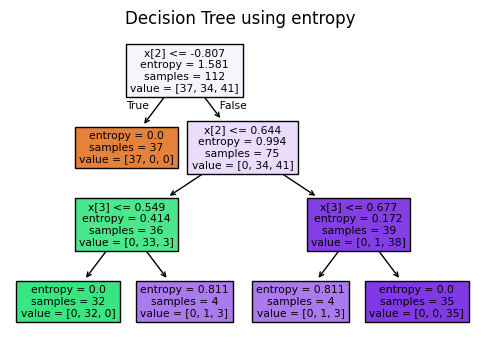

In [19]:
plt.figure(figsize=(6,4))
plot_tree(clf_entropy, filled = True)
plt.title("Decision Tree using entropy ")
plt.show()

In [20]:
text_representation = export_text(clf_entropy)
print('Decision Tree Representation : ')
print(text_representation)

Decision Tree Representation : 
|--- feature_2 <= -0.81
|   |--- class: 0
|--- feature_2 >  -0.81
|   |--- feature_2 <= 0.64
|   |   |--- feature_3 <= 0.55
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.55
|   |   |   |--- class: 2
|   |--- feature_2 >  0.64
|   |   |--- feature_3 <= 0.68
|   |   |   |--- class: 2
|   |   |--- feature_3 >  0.68
|   |   |   |--- class: 2

